# Factories

In this notebook, I shall demonstrate the use of the abstract factory interface for r3d2. 

Abstract factories are a common design pattern used in software engineering in order to create families of classes (see [here](https://sourcemaking.com/design_patterns/abstract_factory) for a description). They help provide a uniform user interface for each family, with the different implementations largely hidden from the user. In the implementation here, this means that once the user has selected a factory (i.e. SWE or reactive relativistic), the functions they then call the initialise and run the Riemann problem are the same.  

In [1]:
import r3d2
from IPython.display import display_png
from matplotlib import pyplot
%matplotlib inline

## SWE factory

Example of the shallow water factory

In [2]:
# create factory
f = r3d2.SWEFactory()

In [3]:
# Concrete objects are created by going through the factory

Ul = f.state(0.41, 0)
Ur = f.state(0.01, 0)

rp = f.riemann_problem(Ul, Ur, t_end=0.3)

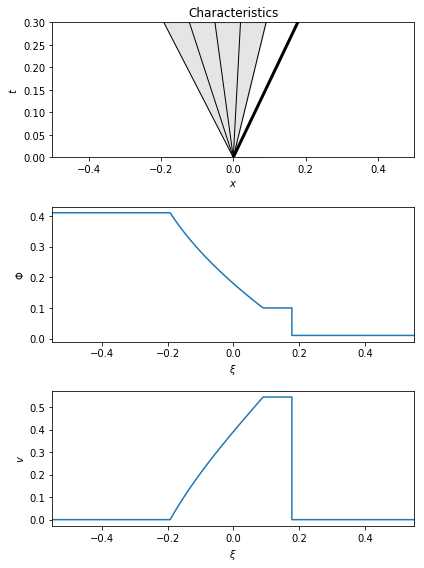

In [4]:
rp

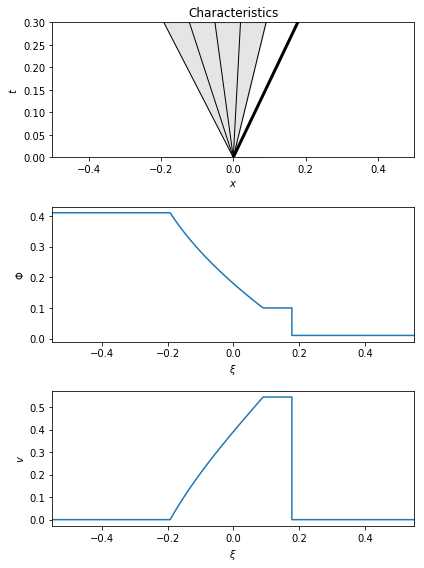

In [5]:
display_png(rp)

## Reactive relativistic factory

By switching factory, we can run the reactive relativistic problem. Note that the state functions have different prototypes - this problem requires more initial data.

In [6]:
rel_f = r3d2.ReactiveRelFactory()

In [7]:
gamma = 5.0/3.0
eos = r3d2.Gamma_law(gamma)
test_1_U_left = rel_f.state(10.0, 0.0, 0.0, 2.0, eos, label="L")
test_1_U_right = rel_f.state(1.0, 0.0, 0.0, 0.5, eos, label="R")

test_1_rp = rel_f.riemann_problem(test_1_U_left, test_1_U_right)

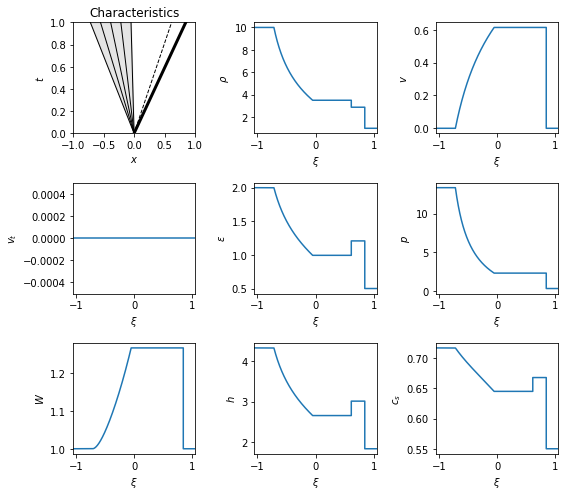

In [8]:
test_1_rp

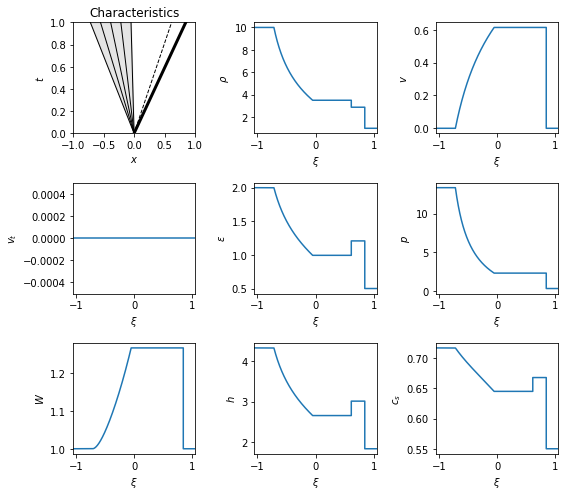

In [9]:
display_png(test_1_rp)

/home/alice/anaconda3/lib/python3.6/site-packages/scipy/integrate/odepack.py:218: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


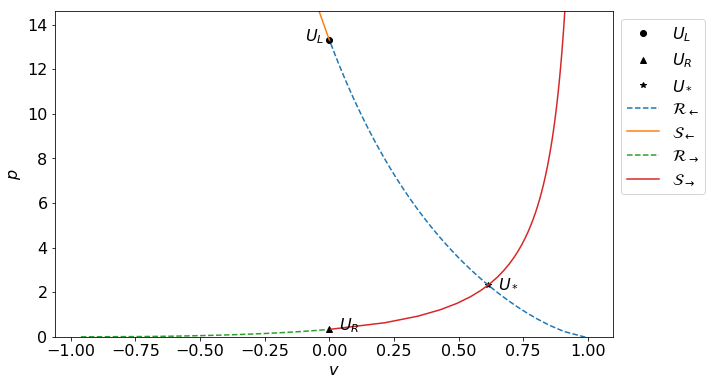

In [10]:
# ReactiveRelRiemannProblem has a plot_P_v function

pyplot.rc("font", size=16)
fig = pyplot.figure(figsize=(10,6))
ax = fig.add_subplot(111)
test_1_rp.plot_P_v(ax, fig)
lgd = ax.get_legend()